In [1]:
import ipyvolume as ipv
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import numpy as np
import skimage
import math

def plot_3d(data, description='Data Title'):  
    table_ct2 = cm.binary(np.linspace(0, 1, 255))
    table_ct2 = cm.inferno(np.linspace(0, 1, 255))
    table_ct2[0:80, 3] = 0 # make the lower values transparent
    # table_ct2[0:25, 3] = 0 # make the lower values transparent
    # table_ct2[25:50, 3] = 0.0 # make the lower values transparent
    # table_ct2[50:100, 3] = 0.4 # make the lower values transparent
    # table_ct2[100:150, 3] = 0.6 # make the lower values transparent
    # table_ct2[150:200, 3] = 0.8 # make the lower values transparent
    # table_ct2[200:250, 3] = 1 # make the lower values transparent
    # table_ct2[0:int(255*np.nanmedian(data)/2), 3] = 0 # make the lower values transparent

    tf_ct2 = ipv.TransferFunction(rgba=table_ct2)

    ipv.clear()
    ipv.figure()
    ct_vol = ipv.quickvolshow(np.flip(data,axis=1), 
                              tf=tf_ct2, lighting=False,  extent=None, description=description)
    # ipv.pylab.save('Data.html')
    ipv.pylab.view(azimuth=45+180, elevation=35, distance=3)
    ipv.show()
    

def threshold_area(volume, area_filter=5, pitch=None, area=None):
    if pitch:
        area_filter = area*(pitch**2)

    binary=volume
    size_map=np.zeros(binary.shape)

    for depth in range(binary.shape[1]):
        thresh_map = skimage.morphology.area_opening(binary[:,depth,:], area_threshold=area_filter, connectivity=2)
        size_map[:,depth,:]=thresh_map
    return size_map

def get_individual_area(data):
    areas=[]
    # Label remaining areas
    labeled_areas = skimage.measure.label(data)

    # Get properties of labeled regions
    properties = skimage.measure.regionprops(labeled_areas)

    # Print the area of each individual region
    for prop in properties:
        print(f"Area of Region {prop.label}: {prop.area}")
        areas.append(prop.area)
    return areas
        
def plot_areas(data):
    # Label remaining areas
    labeled_areas = skimage.measure.label(data)

    # Get properties of labeled regions
    properties = skimage.measure.regionprops(labeled_areas)

    # Plot the areas on the original image
    plt.imshow(data, cmap='gray')
    for prop in properties:
        y, x = prop.centroid
        # plt.text(x, y, str(prop.label), color='red', fontsize=8, ha='center', va='center')
        plt.text(x, y, f"{prop.label}\nDiameter\n{round(gen_diameter(prop.area)*0.8,1)}mm", color='red', fontsize=8, ha='center', va='center')

    plt.title("Labeled Areas")
    plt.show()
    
def gen_diameter(area):
    pi = math.pi
    return 2*np.sqrt(area/pi)


In [52]:
# data=np.load('C:/GIT/Self-supervised-volumetric-detection/results/segmented_volume.npy')
path='C:/GIT/Self-supervised-volumetric-detection/results/US/Program A/MRD-CBSP001/both_segmented_top_half_volume.npy'
path='C:/GIT/Self-supervised-volumetric-detection/results/US/Program A/MRD-CBSP001/both_segmented_volume_rectified_avg20.npy'
# path='C:/GIT/Self-supervised-volumetric-detection/results/learjet/forward_segmented_volume.npy'
# path='C:/GIT/Self-supervised-volumetric-detection/results/segmented_volume_forward_and_back.npy'
# path='C:/GIT/Self-supervised-volumetric-detection/results/segmented_volume_learTechnatom_averageFilter.npy'
data=np.load(path)

test_path='C:/GIT/Self-supervised-volumetric-detection/results/US/Program A/MRD-CBSP001/test_top_half_data.npy'
# test_path='C:/GIT/Self-supervised-volumetric-detection/results/learjet/test_data.npy'
# test_path='C:/GIT/Self-supervised-volumetric-detection/test_learTechnatom_averageFilter.npy'
test= np.load(test_path)

In [53]:
area_thresholded_data=threshold_area(data[:,:,:], area_filter=4.0) #6

In [3]:
print(data.max(), data.min(), data.shape)
print(test.max(), test.min(), test.shape)
plot_3d(test[-80:,:,:])
plot_3d(data)
plot_3d(area_thresholded_data)#

2.0 0.0 (80, 600, 375)
1.0 2.273909065868856e-08 (154, 600, 375)


Container(children=[HBox(children=(FloatLogSlider(value=1.0, description='opacity', max=2.0, min=-2.0), FloatL…

Container(children=[HBox(children=(FloatLogSlider(value=1.0, description='opacity', max=2.0, min=-2.0), FloatL…

NameError: name 'area_thresholded_data' is not defined

In [34]:
import matplotlib.colors as mcolors
num_colors = 256

# Create a custom RGBA array from transparent to red
custom_colors = np.zeros((num_colors, 4))
custom_colors[:, 0] = 1.0  # Red channel
custom_colors[:, 3] = np.linspace(0, 1, num_colors)  # Alpha channel ranges from 0 (transparent) to 1 (opaque)

# Create a custom colormap from the RGBA array
custom_cmap = mcolors.ListedColormap(custom_colors)

C:\Users\Shaun McKnight\AppData\Local\Temp\ipykernel_4136\300641937.py:14: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("bwr").copy()
  cmap.set_under(alpha=1)


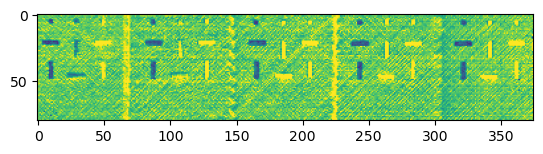

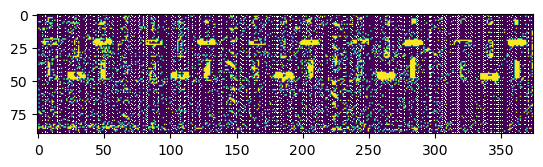

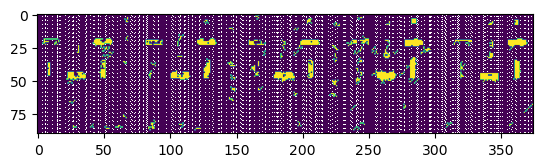

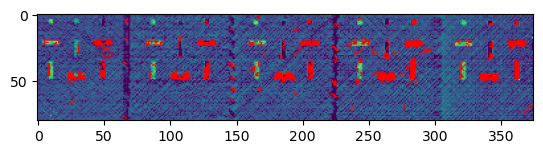

In [54]:
data[data<2]=0

plt.figure()
plt.imshow(np.flip(np.amax(test[-80:,200:,:], axis=1), axis=0))

plt.figure()
plt.imshow(np.amax(data[:,:,:], axis=1))           
plt.figure()
plt.imshow(np.amax(area_thresholded_data[:,:,:], axis=1))
           
plt.figure()
plt.imshow(np.flip(np.amax(test[-80:,200:,:], axis=1), axis=0), 'viridis_r')
cmap = plt.get_cmap('bwr')  # Choose a colormap for the segmentation mask
cmap.set_under(alpha=1) 
plt.imshow(np.amax(area_thresholded_data[:80,:,:], axis=1), cmap=custom_cmap)

In [26]:
data.max(), data.min()

(2.0, 0.0)

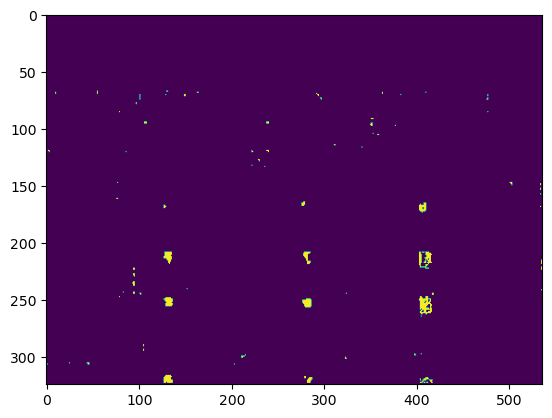

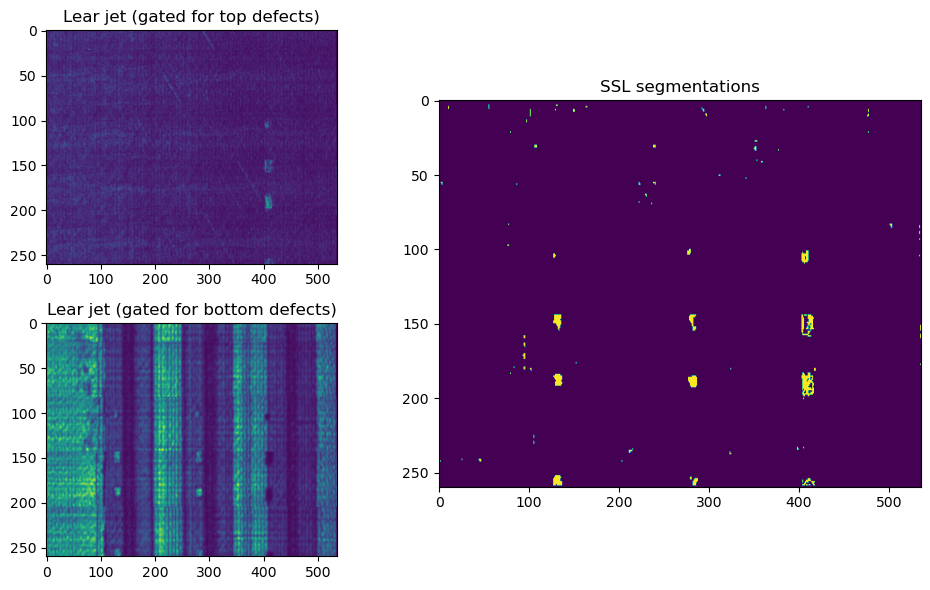

In [21]:
plt.figure()
plt.imshow(np.amax(data[:,40:,:], axis=1), aspect='auto')

aspect_ratio = data.shape[2] / data.shape[0]

# Create a figure and a grid of 2x2
fig = plt.figure(figsize=(10, 6))

# Define the grid for subplot2grid
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)  # First subplot in the first row
ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)  # Second subplot in the second row
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2, colspan=1)  # Third subplot spanning both rows

# Plot on the subplots
ax1.imshow(np.amax(test[64::,50:300,:], axis=1), aspect=aspect_ratio)
ax1.set_title('Lear jet (gated for top defects)')

ax2.imshow(np.amax(test[64::,400:900,:], axis=1), aspect=aspect_ratio)
ax2.set_title('Lear jet (gated for bottom defects)')

thresholded_area = data
# thresholded_area = threshold_area(data, area_filter=12, pitch=None, area=None)
# ax3.imshow(np.amax(data[64:,:,:], axis=1), aspect=aspect_ratio)
ax3.imshow(np.amax(thresholded_area[64:,40:,:], axis=1), aspect=aspect_ratio)
ax3.set_title('SSL segmentations')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plot_areas(np.amax(threshold_area(data, area_filter=10), axis=1))
areas=get_individual_area(np.amax(threshold_area(data, area_filter=10), axis=1))
areas=gen_diameter(np.array(areas))*0.8

areas_9=areas[[0,3,6,9,12]]
areas_7=areas[[1,4,7,10,13]]
areas_6=areas[[2,5,8,11,14]]

print(np.array(areas_9).mean())
print(np.array(areas_7).mean())
print(np.array(areas_6).mean())

plt.figure()
plt.imshow(np.amax(threshold_area(data, area_filter=10), axis=1), aspect='auto')
plt.show()

In [ ]:
print(data.max(), data.min())
plot_3d(np.load('C:/GIT/Self-supervised-volumetric-detection/test_data.npy'))

In [ ]:
plot =(np.load('C:/GIT/Self-supervised-volumetric-detection/errors.npy'))
threshold=19.42
plot[plot<threshold]=0

table_ct2 = cm.plasma(np.linspace(0, 1, 255))
table_ct2[0:25, 3] = 0 # make the lower values transparent
# table_ct2[25:50, 3] = 0.0 # make the lower values transparent
# table_ct2[50:100, 3] = 0.4 # make the lower values transparent
# table_ct2[100:150, 3] = 0.6 # make the lower values transparent
# table_ct2[150:200, 3] = 0.8 # make the lower values transparent
# table_ct2[200:250, 3] = 1 # make the lower values transparent
# table_ct2[0:int(255*np.nanmedian(data)/2), 3] = 0 # make the lower values transparent

tf_ct2 = ipv.TransferFunction(rgba=table_ct2)

ipv.clear()
ipv.figure()
ct_vol = ipv.quickvolshow(np.flip(plot,axis=1), 
                          tf=tf_ct2, lighting=False,  extent=None)
# ipv.pylab.save('Data.html')
ipv.show()

In [ ]:
plt.figure()
plt.hist(data.flatten())